In [54]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")
pwd_rez = os.path.join(path2p, "data")

sys.path.insert(0, libpath) 
print("Appended library directory", libpath)

# User libraries
import graph_lib

%load_ext autoreload
%autoreload 2

Appended library directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-mesoscopic/mesoscopic-functional-connectivity/codes/lib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test 1. Random Matrix with increasing connectivity

In [83]:
# NxN matrix with approximately p random connections
randconn = lambda N,p: (np.random.uniform(0, 1, (N,N)) <= p).astype(int)

# NxN matrix where only the first L elements of the first row are filled
fill1row = lambda N,L: np.vstack((np.array([1]*L + [0]*(N-L)), np.zeros((N-1, N))))
fill1col = lambda N,L: fill1row(N, L).T

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


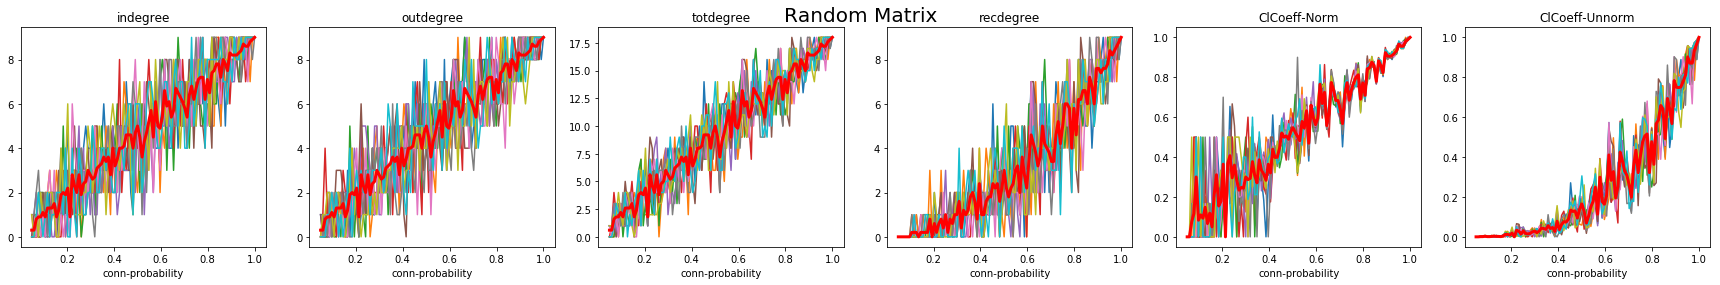

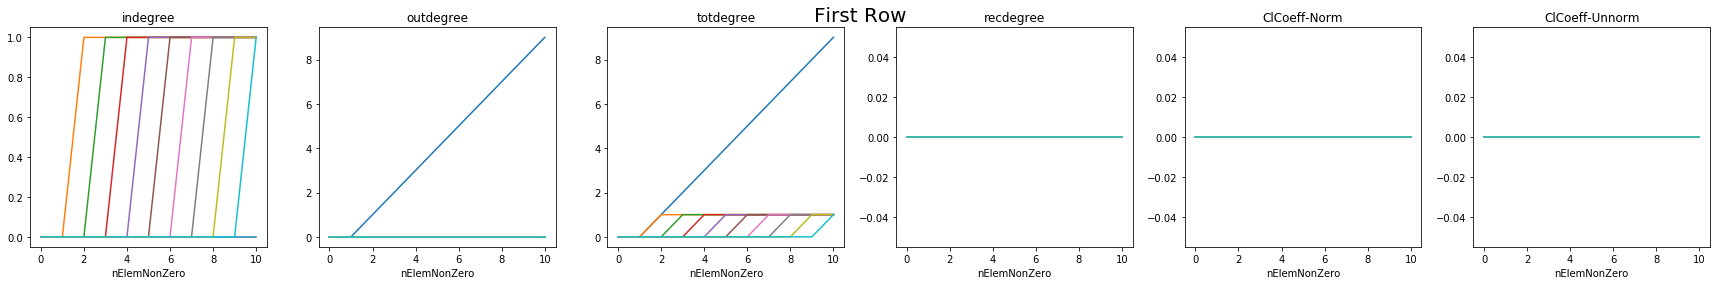

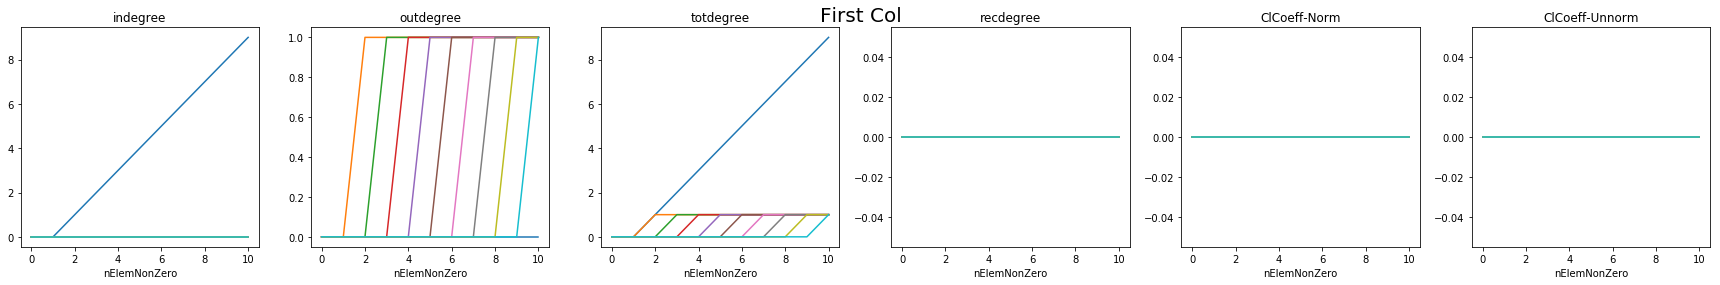

In [84]:
cl_coeff       = lambda M: graph_lib.cl_coeff(M, normDegree=True)
cl_coeffNoNorm = lambda M: graph_lib.cl_coeff(M, normDegree=False)

# Number of nodes in a matrix
nNode = 10

#############################
# List all tests to run
#############################
testFrame = pd.DataFrame({
    "Title"  : ["Random Matrix", "First Row", "First Col"],
    "Func" : [randconn, fill1row, fill1col],
    "PlotMean" : [True, False, False],
    "RangeName" : ["conn-probability", "nElemNonZero", "nElemNonZero"],
    "Range" : [
        np.linspace(0.05, 1, 100),
        np.arange(0, nNode+1),
        np.arange(0, nNode+1)
    ]
})
nTest = len(testFrame["Title"])

#############################
# List all metrics to be evaluated
#############################
taskFrame = pd.DataFrame({
    "Name" : ['indegree', 'outdegree', 'totdegree', 'recdegree', 'ClCoeff-Norm', 'ClCoeff-Unnorm'],
    "Func" : [
        graph_lib.degree_in,
        graph_lib.degree_out,
        graph_lib.degree_tot,
        graph_lib.degree_rec,
        cl_coeff,
        cl_coeffNoNorm]})
nTask = len(taskFrame["Name"])

for iTest in range(nTest):
    testfunc  = testFrame["Func"][iTest]
    testrange = testFrame["Range"][iTest]
    testrangename = testFrame["RangeName"][iTest]
    testplotmean = testFrame["PlotMean"][iTest]
    
    #############################
    # Compute different metrics for random matrices
    #############################
    nTrial = len(testrange)
    data = np.zeros((nTask, nTrial, nNode))
    for iTrial in range(nTrial):
        M = testfunc(nNode, testrange[iTrial])
        for iTask in range(nTask):
            data[iTask, iTrial] = taskFrame["Func"][iTask](M)

    #############################
    # Plot these metrics
    #############################
    fig, ax = plt.subplots(ncols=nTask, figsize=(4*nTask, 4), tight_layout=True)
    fig.suptitle(testFrame["Title"][iTest], fontsize=20)
    for iTask in range(nTask):
        ax[iTask].set_xlabel(testrangename)
        ax[iTask].set_title(taskFrame["Name"][iTask])
        ax[iTask].plot(testrange, data[iTask])
        if testplotmean:
            ax[iTask].plot(testrange, np.mean(data[iTask], axis=1), 'r', linewidth=3)
    plt.show()